In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
###! unzip /content/Participants_Data_GGSH_Solution_Notebook.zip

In [5]:
# Load the data
india_train = pd.read_csv("/content/India_train.csv")
india_test = pd.read_csv("/content/India_test.csv")
usa_train = pd.read_csv("/content/USA_train.csv")
usa_test = pd.read_csv("/content/USA_test.csv")
soil_rainfall = pd.read_csv("/content/India_soil_rainfall_30years.csv")
commodity = pd.read_csv("/content/USA_Commodity_prices.csv")
submission = pd.read_csv("/content/submission.csv")

In [6]:
print("The training set of India", india_train.columns)
print("The testing set of India", india_test.columns)
print("The training set of USA", usa_train.columns)
print("The testing set of USA", usa_test.columns)
print("The commodity data", commodity.columns)
print("The submission data", submission.columns)

The training set of India Index(['Year', 'State Name', 'Dist Name', 'COTTON AREA (1000 ha)',
       'COTTON PRODUCTION (1000 tons)', 'COTTON YIELD (Kg per ha)',
       'JANUARY PERCIPITATION (Millimeters)',
       'FEBRUARY PERCIPITATION (Millimeters)',
       'MARCH PERCIPITATION (Millimeters)',
       'APRIL PERCIPITATION (Millimeters)',
       ...
       'PHOSPHATE SHARE IN NPK (Percent)',
       'PHOSPHATE PER HA OF NCA (Kg per ha)',
       'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH CONSUMPTION (tons)',
       'POTASH SHARE IN NPK (Percent)', 'POTASH PER HA OF NCA (Kg per ha)',
       'POTASH PER HA OF GCA (Kg per ha)', 'TOTAL CONSUMPTION (tons)',
       'TOTAL PER HA OF NCA (Kg per ha)', 'TOTAL PER HA OF GCA (Kg per ha)'],
      dtype='object', length=103)
The testing set of India Index(['Year', 'State Name', 'Dist Name', 'COTTON AREA (1000 ha)',
       'COTTON PRODUCTION (1000 tons)', 'COTTON YIELD (Kg per ha)',
       'JANUARY PERCIPITATION (Millimeters)',
       'FEBRUARY P

In [7]:
india_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [8]:
india_train=india_train.fillna("0")

In [9]:
india_test=india_test.fillna("0")

In [10]:
###! pip install klib

In [11]:
import klib

In [12]:
india_train=klib.clean_column_names(india_train)

Long column names detected (>25 characters). Consider renaming the following columns ['cotton_production_1000_tons', 'january_percipitation_millimeters', 'february_percipitation_millimeters', 'march_percipitation_millimeters', 'april_percipitation_millimeters', 'may_percipitation_millimeters', 'june_percipitation_millimeters', 'july_percipitation_millimeters', 'august_percipitation_millimeters', 'september_percipitation_millimeters', 'october_percipitation_millimeters', 'november_percipitation_millimeters', 'december_percipitation_millimeters', 'january_minimum_centigrate', 'february_minimum_centigrate', 'september_minimum_centigrate', 'october_minimum_centigrate', 'november_minimum_centigrate', 'december_minimum_centigrate', 'january_maximum_centigrate', 'february_maximum_centigrate', 'september_maximum_centigrate', 'october_maximum_centigrate', 'november_maximum_centigrate', 'december_maximum_centigrate', 'january_water_deficit_millimeters', 'february_water_deficit_millimeters', 'mar

In [13]:
india_test=klib.clean_column_names(india_test)

Long column names detected (>25 characters). Consider renaming the following columns ['cotton_production_1000_tons', 'january_percipitation_millimeters', 'february_percipitation_millimeters', 'march_percipitation_millimeters', 'april_percipitation_millimeters', 'may_percipitation_millimeters', 'june_percipitation_millimeters', 'july_percipitation_millimeters', 'august_percipitation_millimeters', 'september_percipitation_millimeters', 'october_percipitation_millimeters', 'november_percipitation_millimeters', 'december_percipitation_millimeters', 'january_minimum_centigrate', 'february_minimum_centigrate', 'september_minimum_centigrate', 'october_minimum_centigrate', 'november_minimum_centigrate', 'december_minimum_centigrate', 'january_maximum_centigrate', 'february_maximum_centigrate', 'september_maximum_centigrate', 'october_maximum_centigrate', 'november_maximum_centigrate', 'december_maximum_centigrate', 'january_water_deficit_millimeters', 'february_water_deficit_millimeters', 'mar

In [14]:
usa_train=klib.clean_column_names(usa_train)
usa_test=klib.clean_column_names(usa_test)

Long column names detected (>25 characters). Consider renaming the following columns ['yield_pounds_harvested_area', 'average_temperature_anomaly', 'maximum_temperature_anomaly', 'minimum_temperature_anomaly', 'cooling_degree_days_anomaly', 'heating_degree_days_anomaly', 'palmer_drought_severity_index_pdsi_value', 'palmer_drought_severity_index_pdsi_anomaly', 'palmer_hydrological_drought_index_phdi_value', 'palmer_hydrological_drought_index_phdi_anomaly', 'palmer_modified_drought_index_pmdi_value', 'palmer_modified_drought_index_pmdi_anomaly'].
Long column names detected (>25 characters). Consider renaming the following columns ['yield_pounds_harvested_area', 'average_temperature_anomaly', 'maximum_temperature_anomaly', 'minimum_temperature_anomaly', 'cooling_degree_days_anomaly', 'heating_degree_days_anomaly', 'palmer_drought_severity_index_pdsi_value', 'palmer_drought_severity_index_pdsi_anomaly', 'palmer_hydrological_drought_index_phdi_value', 'palmer_hydrological_drought_index_phdi

In [15]:
india_train = klib.convert_datatypes(india_train)
india_test=klib.convert_datatypes(india_test)
usa_train=klib.convert_datatypes(usa_train)
usa_test=klib.convert_datatypes(usa_test)

In [16]:
submission=klib.clean_column_names(submission)
submission=klib.convert_datatypes(submission)

Long column names detected (>25 characters). Consider renaming the following columns ['yield_pounds_harvested_area'].


In [18]:
commodity=klib.clean_column_names(commodity)
commodity=klib.convert_datatypes(commodity)

In [17]:
soil_rainfall=klib.clean_column_names(soil_rainfall)
soil_rainfall=klib.convert_datatypes(soil_rainfall)

Long column names detected (>25 characters). Consider renaming the following columns ['january_normal_rainfall_millimeters', 'february_normal_rainfall_millimeters', 'march_normal_rainfall_millimeters', 'april_normal_rainfall_millimeters', 'may_normal_rainfall_millimeters', 'june_normal_rainfall_millimeters', 'july_normal_rainfall_millimeters', 'august_normal_rainfall_millimeters', 'september_normal_rainfall_millimeters', 'october_normal_rainfall_millimeters', 'november_normal_rainfall_millimeters', 'december_normal_rainfall_millimeters', 'annual_normal_rainfall_millimeters'].


In [19]:
commodity.columns

Index(['year', 'cotton_price[dollar_ton]'], dtype='object')

In [20]:
submission.columns

Index(['yield_pounds_harvested_area', 'cotton_yield_kg_per_ha',
       'cotton_price[dollar_ton]'],
      dtype='object')

In [21]:
india_train = india_train.drop(['state_name','dist_name'], axis=1)

In [22]:
india_test = india_test.drop(['state_name','dist_name'], axis=1)

In [23]:
columns = india_train.columns

In [24]:
columns

Index(['year', 'cotton_area_1000_ha', 'cotton_production_1000_tons',
       'cotton_yield_kg_per_ha', 'january_percipitation_millimeters',
       'february_percipitation_millimeters', 'march_percipitation_millimeters',
       'april_percipitation_millimeters', 'may_percipitation_millimeters',
       'june_percipitation_millimeters',
       ...
       'phosphate_share_in_npk_percent', 'phosphate_per_ha_of_nca_kg_per_ha',
       'phosphate_per_ha_of_gca_kg_per_ha', 'potash_consumption_tons',
       'potash_share_in_npk_percent', 'potash_per_ha_of_nca_kg_per_ha',
       'potash_per_ha_of_gca_kg_per_ha', 'total_consumption_tons',
       'total_per_ha_of_nca_kg_per_ha', 'total_per_ha_of_gca_kg_per_ha'],
      dtype='object', length=101)

In [25]:
features = columns
target = 'cotton_yield_kg_per_ha'

X_train = india_train[features]
y_train = india_train[target]

In [26]:
features = columns
target = 'cotton_yield_kg_per_ha'

X_test = india_test[features]
y_test = india_test[target]

### Feature Importance

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.0097251  0.03636573 0.03637869 0.06804102 0.00771028 0.00733222
 0.00719685 0.00740579 0.00787133 0.00770195 0.00831104 0.00966363
 0.00761606 0.00740349 0.00757913 0.00651995 0.00823893 0.00838758
 0.00713203 0.00735948 0.00727912 0.00702784 0.00722699 0.00719222
 0.0074717  0.00712473 0.00750377 0.00788862 0.00835032 0.00775705
 0.00770009 0.00741753 0.00710049 0.00743945 0.00705004 0.00723882
 0.00697286 0.00721609 0.00724594 0.00774351 0.01483987 0.01564071
 0.01239311 0.008976   0.00885016 0.00963634 0.00802476 0.00996509
 0.00905019 0.01250257 0.01093836 0.01040839 0.01071624 0.01051522
 0.00796104 0.00815982 0.00791241 0.0080051  0.00788318 0.00791209
 0.00866416 0.00856686 0.00755964 0.01199636 0.01132443 0.00948742
 0.00833886 0.00772308 0.00841623 0.00907513 0.00872139 0.00961805
 0.0086041  0.01052845 0.01217391 0.0096686  0.00898692 0.01166507
 0.01074821 0.0086976  0.01000873 0.00917052 0.00929392 0.01327902
 0.01096829 0.00775379 0.00994778 0.00865251 0.00844438 0.0083

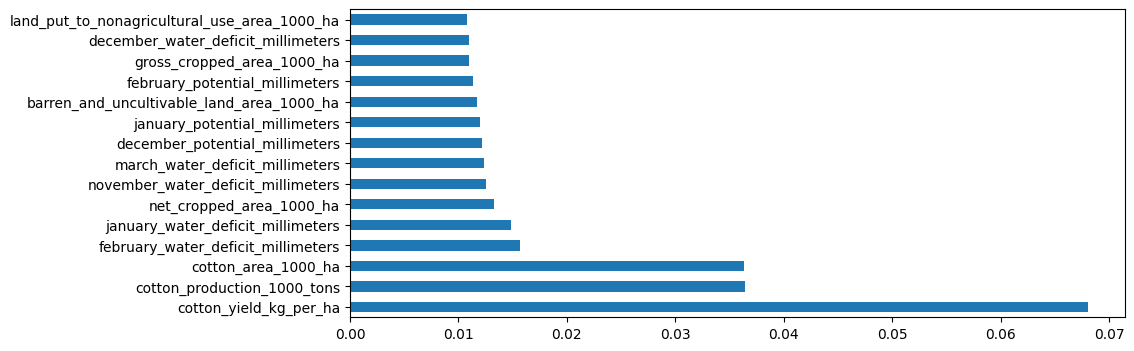

In [29]:
plt.figure(figsize = [10,4])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

<ipython-input-30-80a32bf661e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<Axes: >

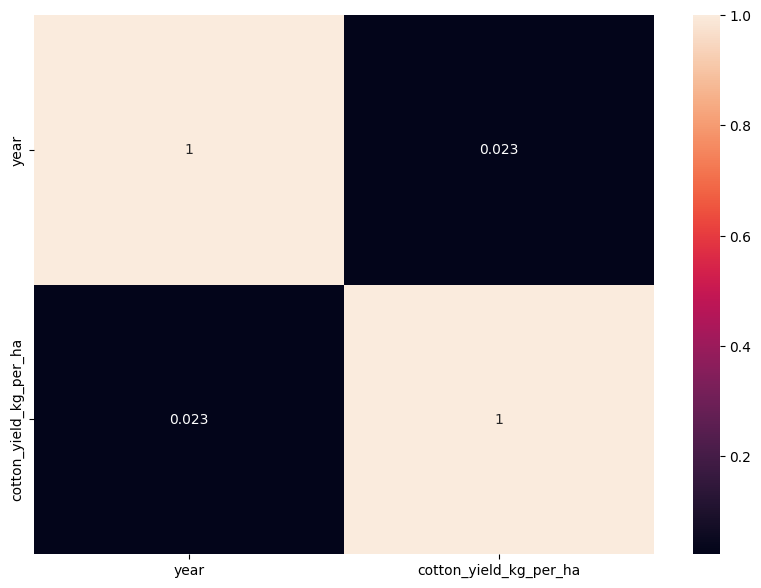

In [30]:

import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(10,7))
sns.heatmap(X_train[top_features].corr(),annot=True)

In [31]:

threshold=0.6

### Mutual Correlation

In [33]:

# find and remove correlated features
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
          colname = corr_matrix.columns[i] # getting the name of column
          col_corr.add(colname)

    return col_corr

In [34]:
correlation(X_train,threshold)

<ipython-input-33-33482dcab118>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


set()

In [35]:
from sklearn.feature_selection import mutual_info_classif

In [36]:
mutual_info=mutual_info_classif(X_train,y_train)

In [37]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

cotton_yield_kg_per_ha                3.174807
cotton_production_1000_tons           0.694008
cotton_area_1000_ha                   0.668689
total_area_1000_ha                    0.228997
february_water_deficit_millimeters    0.197230
                                        ...   
october_percipitation_millimeters     0.020532
october_maximum_centigrate            0.018061
june_minimum_centigrate               0.012838
july_water_deficit_millimeters        0.011469
november_percipitation_millimeters    0.001508
Length: 101, dtype: float64

In [38]:
X_train.drop(columns="november_percipitation_millimeters", inplace=True)

In [39]:
X_test.drop(columns="november_percipitation_millimeters", inplace=True)

In [40]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

### Checking the Variance Threshold

In [41]:
# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Feature selection", sel.get_support())
print("Selected features:", list(X_train.columns[sel.get_support()]))
print("Removed features:", list(X_train.columns[~sel.get_support()]))

Feature selection [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Selected features: ['year', 'cotton_area_1000_ha', 'cotton_production_1000_tons', 'cotton_yield_kg_per_ha', 'january_percipitation_millimeters', 'february_percipitation_millimeters', 'march_percipitation_millimeters', 'april_percipitation_millimeters', 'may_percipitation_millimeters', 'june_percipitation_millimeters', 'july_percipitation_millimeters', 'august_percipitat

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [43]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [46]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [48]:
best_random_grid=rf_random.best_estimator_

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_per_ha=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_per_ha))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_per_ha)))
print("Classification report: {}".format(classification_report(y_test,y_pred_per_ha)))

[[   0    0]
 [   3 2473]]
Accuracy Score 0.9987883683360258
Classification report:               precision    recall  f1-score   support

          -6       0.00      0.00      0.00         0
           0       1.00      1.00      1.00      2476

    accuracy                           1.00      2476
   macro avg       0.50      0.50      0.50      2476
weighted avg       1.00      1.00      1.00      2476



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
y_pred_per_ha=pd.DataFrame(y_pred_per_ha)

In [155]:
y_pred_per_ha.shape

(2476, 1)

# Let train USA data

In [121]:
usa_train2 = pd.read_csv("/content/USA_train.csv")

In [122]:
usa_test2 = pd.read_csv("/content/USA_test.csv")

In [123]:
usa_train2.columns

Index(['Year', 'State', 'Planted (1000 Acres)', 'Harvested (1000 Acres)',
       'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')

In [124]:
usa_test2.columns

Index(['Year', 'State', 'Planted (1000 Acres)', 'Harvested (1000 Acres)',
       'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')

In [125]:
usa_train2=usa_train2.fillna("0")

In [126]:
usa_test2=usa_test2.fillna("0")

In [127]:
columns = usa_train2.columns

In [128]:
usa_train2= usa_train2.astype(float, errors='ignore')

In [129]:
###! pip install klib

In [130]:
import klib

In [131]:
usa_train2 = klib.convert_datatypes(usa_train2)

In [132]:
usa_test2 = klib.convert_datatypes(usa_test2)

In [133]:
usa_train2=klib.clean_column_names(usa_train2)
usa_test2=klib.clean_column_names(usa_test2)

Long column names detected (>25 characters). Consider renaming the following columns ['yield_pounds_harvested_area', 'average_temperature_anomaly', 'maximum_temperature_anomaly', 'minimum_temperature_anomaly', 'cooling_degree_days_anomaly', 'heating_degree_days_anomaly', 'palmer_drought_severity_index_pdsi_value', 'palmer_drought_severity_index_pdsi_anomaly', 'palmer_hydrological_drought_index_phdi_value', 'palmer_hydrological_drought_index_phdi_anomaly', 'palmer_modified_drought_index_pmdi_value', 'palmer_modified_drought_index_pmdi_anomaly'].
Long column names detected (>25 characters). Consider renaming the following columns ['yield_pounds_harvested_area', 'average_temperature_anomaly', 'maximum_temperature_anomaly', 'minimum_temperature_anomaly', 'cooling_degree_days_anomaly', 'heating_degree_days_anomaly', 'palmer_drought_severity_index_pdsi_value', 'palmer_drought_severity_index_pdsi_anomaly', 'palmer_hydrological_drought_index_phdi_value', 'palmer_hydrological_drought_index_phdi

In [134]:
usa_train2.dtypes

year                                               float32
state                                             category
planted_1000_acres                                  string
harvested_1000_acres                                string
yield_pounds_harvested_area                        float32
average_temperature_value                          float32
average_temperature_anomaly                        float32
maximum_temperature_value                          float32
maximum_temperature_anomaly                        float32
minimum_temperature_value                          float32
minimum_temperature_anomaly                        float32
precipitation_value                                float32
precipitation_anomaly                              float32
cooling_degree_days_value                          float32
cooling_degree_days_anomaly                        float32
heating_degree_days_value                          float32
heating_degree_days_anomaly                        float

In [135]:
usa_train2=usa_train2.drop(['planted_1000_acres', "harvested_1000_acres"], axis=1)

In [136]:
usa_test2.dtypes

year                                               int16
state                                             string
planted_1000_acres                                string
harvested_1000_acres                              string
yield_pounds_harvested_area                         int8
average_temperature_value                         object
average_temperature_anomaly                       object
maximum_temperature_value                         object
maximum_temperature_anomaly                       object
minimum_temperature_value                         object
minimum_temperature_anomaly                       object
precipitation_value                               object
precipitation_anomaly                             object
cooling_degree_days_value                         object
cooling_degree_days_anomaly                       object
heating_degree_days_value                         object
heating_degree_days_anomaly                       object
palmer_drought_severity_index_p

In [137]:
usa_test2=usa_test2.drop(['planted_1000_acres', "harvested_1000_acres"], axis=1)

In [138]:
usa_train2["state"] = usa_train2["state"].astype('category').cat.codes

In [139]:
usa_test2["state"] = usa_test2["state"].astype('category').cat.codes

In [140]:
columns = usa_train2.columns

In [141]:
features = columns
target = 'yield_pounds_harvested_area'


In [142]:

X_train = usa_train2[features]
y_train = usa_train2[target]

In [143]:

X_test = usa_test2[features]
y_test = usa_test2[target]

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [145]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [146]:
print(model.feature_importances_)

[0.03901599 0.04563088 0.11648583 0.04253589 0.03803132 0.04564878
 0.03848104 0.04343178 0.03778664 0.03911392 0.03786148 0.04023791
 0.03927418 0.04955733 0.03722574 0.03866976 0.03928426 0.03814593
 0.03952562 0.03748631 0.0377354  0.03892021 0.03991378]


<Axes: >

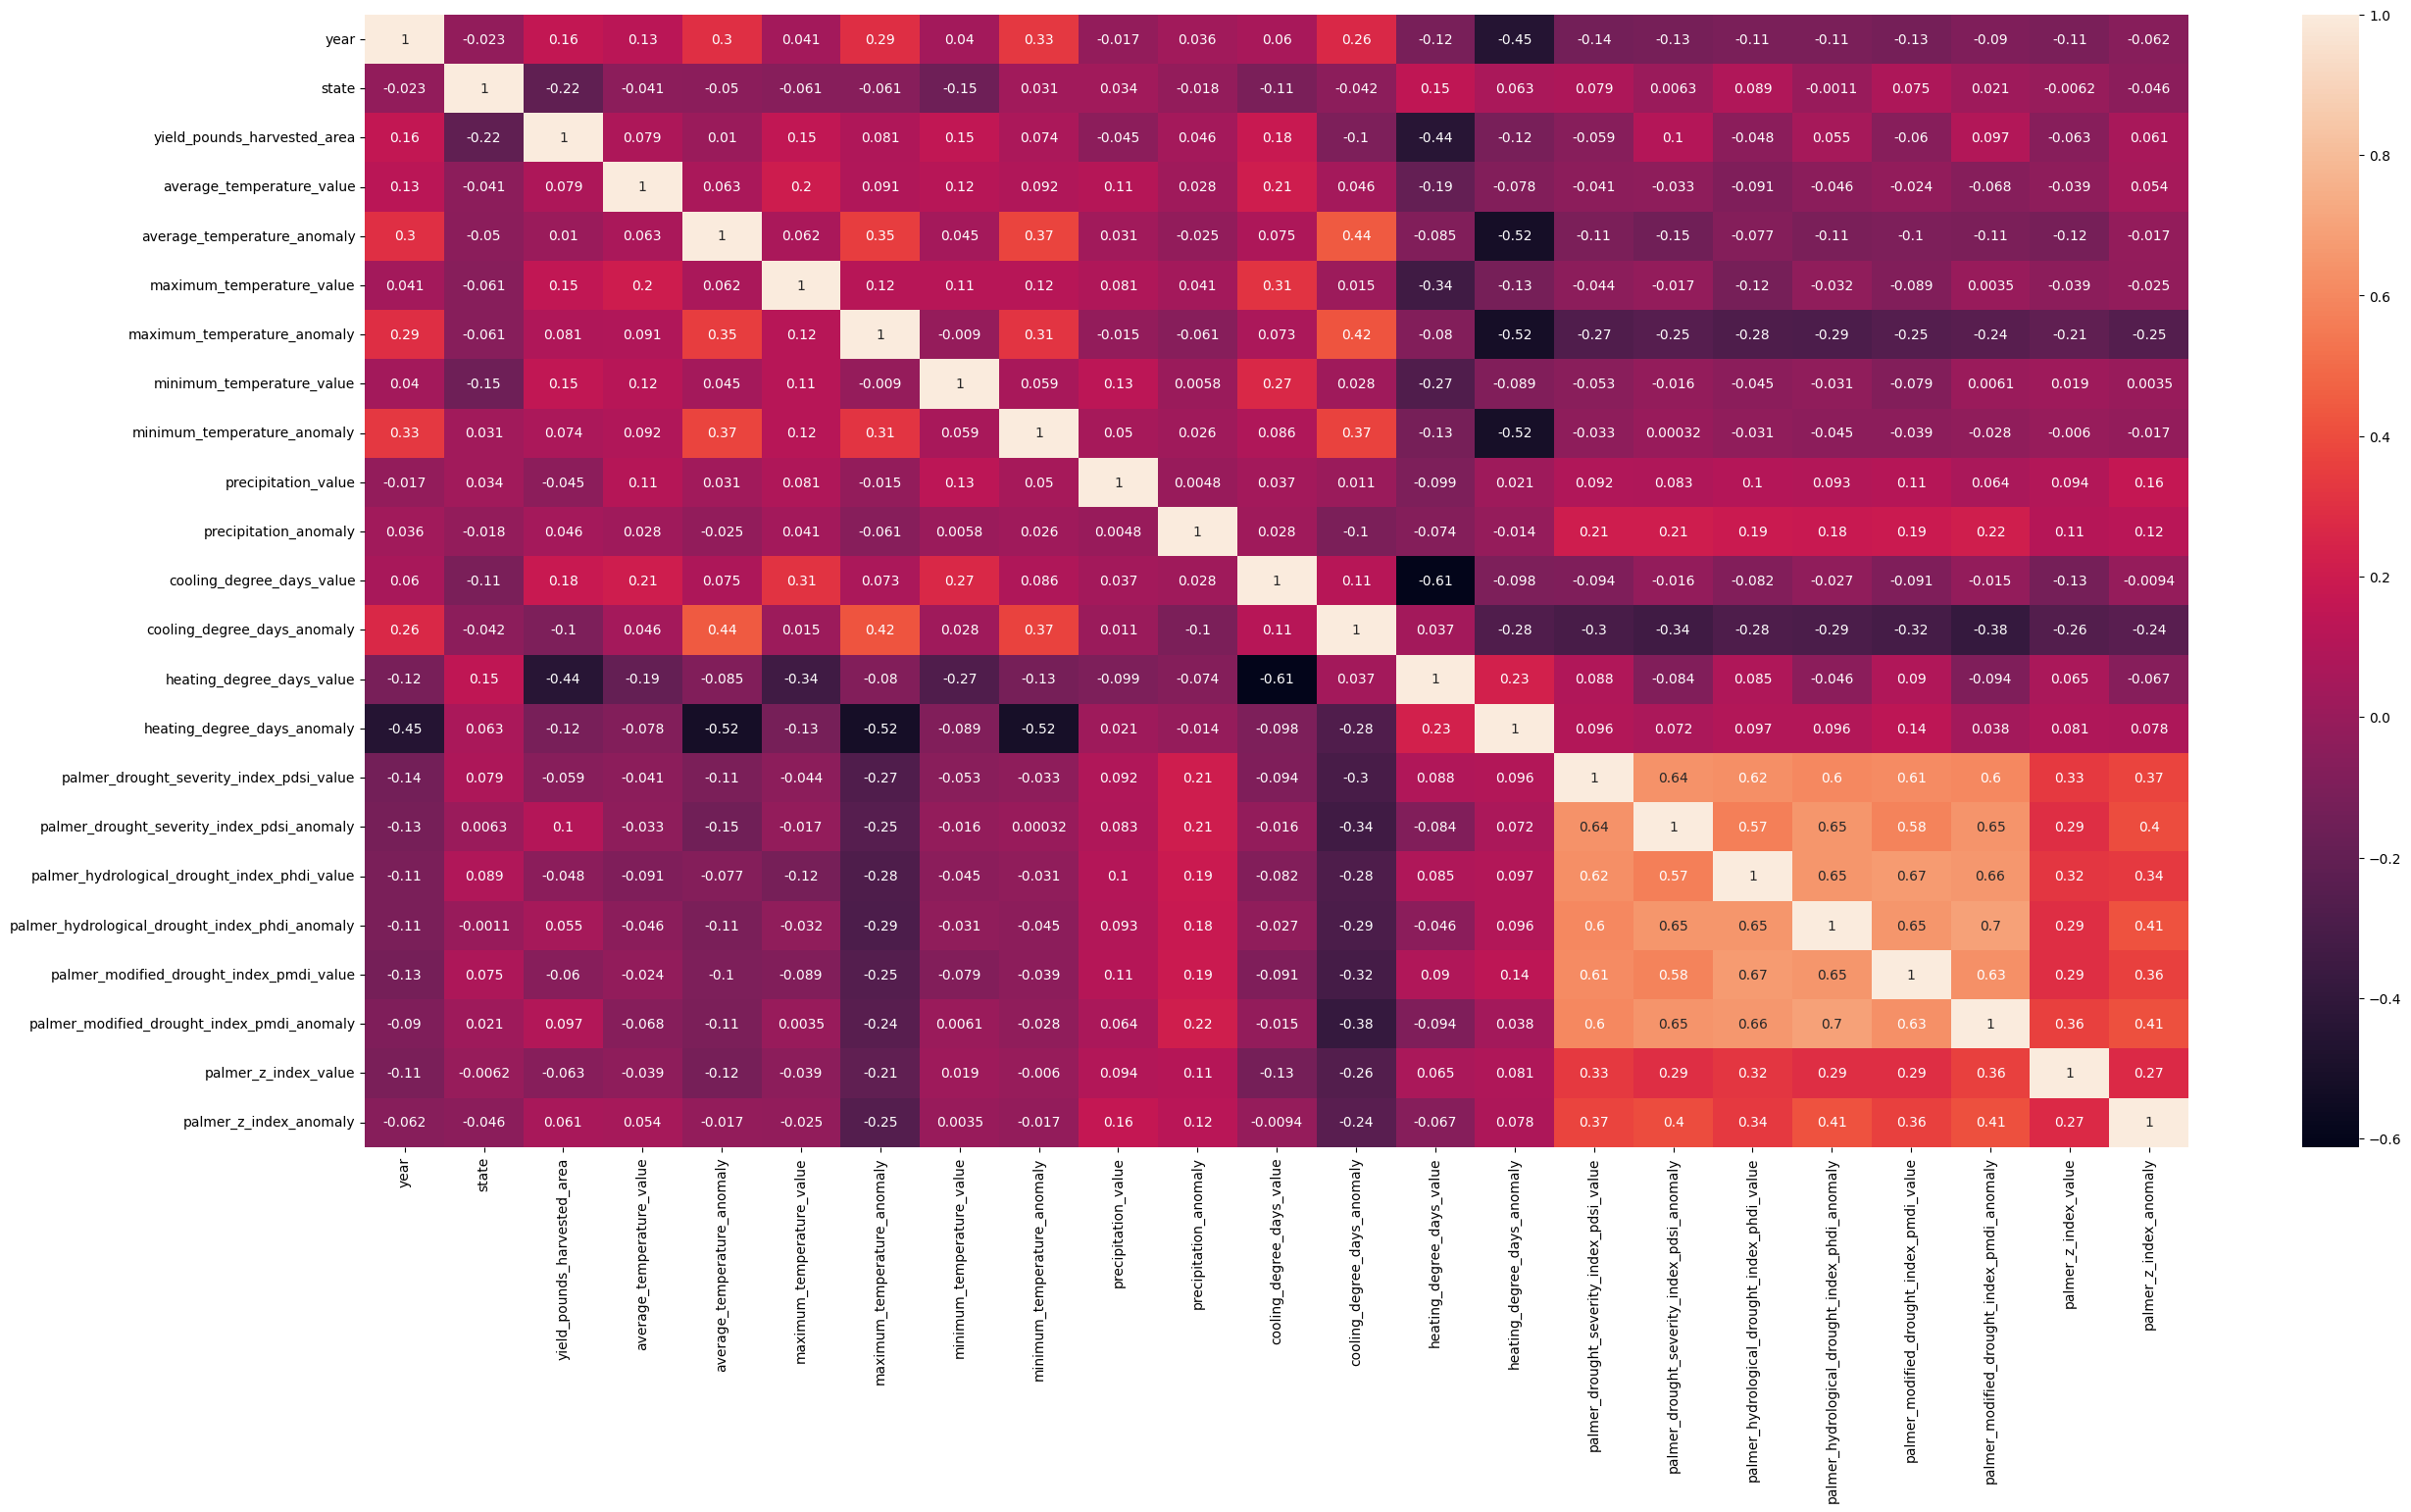

In [147]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(30,15))
sns.heatmap(X_train[top_features].corr(),annot=True)


In [148]:
threshold=0.6

In [149]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [150]:
correlation(X_train,threshold)

{'heating_degree_days_value',
 'palmer_drought_severity_index_pdsi_anomaly',
 'palmer_hydrological_drought_index_phdi_anomaly',
 'palmer_hydrological_drought_index_phdi_value',
 'palmer_modified_drought_index_pmdi_anomaly',
 'palmer_modified_drought_index_pmdi_value'}

In [151]:
X_train.drop(columns = {'heating_degree_days_value',
 'palmer_drought_severity_index_pdsi_anomaly',
 'palmer_hydrological_drought_index_phdi_anomaly',
 'palmer_hydrological_drought_index_phdi_value',
 'palmer_modified_drought_index_pmdi_anomaly',
 'palmer_modified_drought_index_pmdi_value'} , inplace=True)

In [152]:
X_test.drop(columns = {'heating_degree_days_value',
 'palmer_drought_severity_index_pdsi_anomaly',
 'palmer_hydrological_drought_index_phdi_anomaly',
 'palmer_hydrological_drought_index_phdi_value',
 'palmer_modified_drought_index_pmdi_anomaly',
 'palmer_modified_drought_index_pmdi_value'} , inplace=True)

In [153]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 17) (400, 17) (560,) (400,)


In [156]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


In [157]:

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [159]:
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [160]:
best_random_grid=rf_random.best_estimator_


In [161]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_harvested_area=best_random_grid.predict(X_test)

In [162]:
print(confusion_matrix(y_test,y_pred_harvested_area))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_harvested_area)))
print("Classification report: {}".format(classification_report(y_test,y_pred_harvested_area)))

[[400]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [163]:
y_pred_harvested_area = pd.DataFrame(y_pred_harvested_area)

In [164]:
y_pred_harvested_area.shape

(400, 1)

### Commodity

In [165]:
commodity.columns

Index(['year', 'cotton_price[dollar_ton]'], dtype='object')

In [166]:
commodity.dtypes

year                          int16
cotton_price[dollar_ton]    float32
dtype: object

In [167]:
submission_commodity=commodity["cotton_price[dollar_ton]"]

In [169]:
print(submission_commodity.shape, y_pred_per_ha.shape, y_pred_harvested_area.shape)

(48,) (2476, 1) (400, 1)


In [173]:
y_pred_harvested_area.rename(columns = {0:"Yield (Pounds/ Harvested Area)"}, inplace=True)

In [174]:
y_pred_per_ha.rename(columns = {0:"COTTON YIELD (Kg per ha)"}, inplace=True)

In [182]:
submission = pd.concat([y_pred_harvested_area,y_pred_per_ha,submission_commodity],axis=1)

In [183]:
submission

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),cotton_price[dollar_ton]
0,0.0,0,1055.792480
1,0.0,0,1582.035278
2,0.0,0,1399.933716
3,0.0,0,1350.109253
4,0.0,0,1428.152832
...,...,...,...
2471,NaN,0,NaN
2472,NaN,0,NaN
2473,NaN,0,NaN
2474,NaN,0,NaN


In [184]:
submission = submission.fillna(0)

In [185]:
submission.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),cotton_price[dollar_ton]
0,0.0,0,1055.792480
1,0.0,0,1582.035278
2,0.0,0,1399.933716
3,0.0,0,1350.109253
4,0.0,0,1428.152832


In [186]:
submission.to_csv("submission_final.csv",index=False)

In [187]:
sub = pd.read_csv("/content/submission.csv")

In [181]:
sub.columns

Index(['Yield (Pounds/ Harvested Area)', 'COTTON YIELD (Kg per ha)',
       'Cotton_Price[Dollar/ton]'],
      dtype='object')